# Team Assignment 1 part 4

### (I)

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
# loading the iris dataset
iris = datasets.load_iris()
# fitting a NB model to the data
model = GaussianNB()
model.fit(iris.data, iris.target)
print("Model: ", model)

Model:  GaussianNB()


In [3]:
# making predictions
expected_NB = iris.target
predicted_NB = model.predict(iris.data)
print("Expected: \n", expected_NB)
print("Predicted: \n", predicted_NB)

Expected: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
# summarize the fit of the model
print("Classification Report: \n", metrics.classification_report(expected_NB, predicted_NB))
cm_NB = metrics.confusion_matrix(expected_NB, predicted_NB)
print("Confusion Matrix: \n", cm_NB)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Confusion Matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### (II) 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
iris = datasets.load_iris()
# converting dataset to pandas dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['sepal length (cm)', 'sepial width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'species']

In [7]:
# view of the first 5 rows of DataFrame
df.head()

,sepal length (cm),sepial width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [8]:
# Total observations in dataset
len(df.index)

150

In [12]:
# defining predictor and response variables
X = df[['sepal length (cm)', 'sepial width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']
# fitting LDA model
model = LinearDiscriminantAnalysis()
print("Model: ", model)
model.fit(X, y)

Model:  LinearDiscriminantAnalysis()


LinearDiscriminantAnalysis()

In [13]:
# defining method to evaluate the model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
# evaluating the model
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
print(np.mean(scores))

0.9800000000000001


In [14]:
# defining new observation
new = [5, 3, 1, .4]
# predicting which class the new observation belongs to
model.predict([new])
np.array(['setosa'], dtype = '<U10')

array(['setosa'], dtype='<U10')

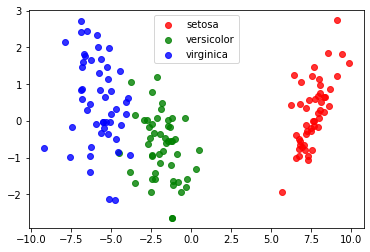

In [15]:
# defining the data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names
# create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
length_width = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha = 0.8, color = color, label = target_name)
# adding legen to plot
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.show()

In [18]:
expected_LDA = iris.target
predicted_LDA = model.predict(iris.data)
print("Expected: \n", expected_LDA)
print("Predicted: \n", predicted_LDA)
print("Classification Report: \n", metrics.classification_report(expected_LDA, predicted_LDA))
cm_LDA = metrics.confusion_matrix(expected_LDA, predicted_LDA)
print("Confusion Matrix: \n", cm_LDA)

Expected: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg

### (III) 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [27]:
plt.rcdefaults()

In [28]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
iris["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [31]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
x_iris = pd.DataFrame(data = iris["data"], columns = iris["feature_names"])
x_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y_iris = pd.DataFrame(data = iris["target"], columns = ["species"])
y_iris.head()

,species
0,0
1,0
2,0
3,0
4,0


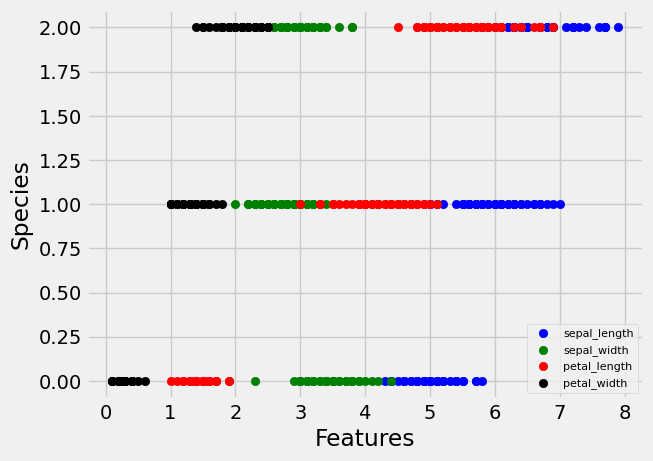

In [35]:
plt.style.use("fivethirtyeight")
plt.xlabel('Features')
plt.ylabel('Species')
plt_x = x_iris.loc[:, 'sepal length (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='blue', label='sepal_length')
plt_x = x_iris.loc[:, 'sepal width (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='green', label='sepal_width')
plt_x = x_iris.loc[:, 'petal length (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='red', label='petal_length')
plt_x = x_iris.loc[:, 'petal width (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='black', label='petal_width')
plt.legend(loc = 4, prop = {'size':8})
plt.show()

In [36]:
for i in range(10):
    x_iris["species"] = y_iris["species"]
    x_iris = shuffle(x_iris)
    y_test: object
    x_train, x_test, y_train, y_test = train_test_split(x_iris.iloc[:, :-1], x_iris.loc[:, "species"], 
                                                        test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    print(accuracy_score(y_test, predict))

print("Classification Report: \n", classification_report(y_test, predict))

1.0
0.9333333333333333
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9333333333333333
1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
expected_LR = iris.target
predicted_LR = model.predict(iris.data)
cm_LR = metrics.confusion_matrix(expected_LR, predicted_LR)
print("Confusion Matrix: \n", cm_LR)

Confusion Matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
X = iris.data
y = iris.target
y = label_binarize(y, classes = [0, 1, 2])
n_classes = y.shape[1]

In [47]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=random_state)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [49]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],  y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),  y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

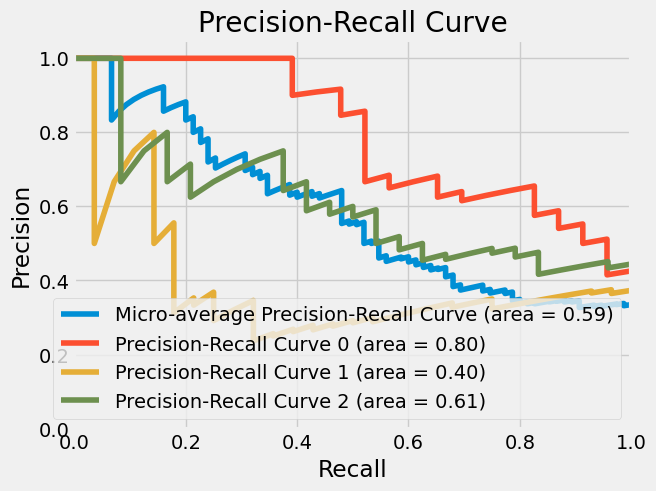

In [53]:
plt.plot(recall["micro"], precision["micro"], 
         label = 'Micro-average Precision-Recall Curve (area = {0:0.2f})'.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
            label = 'Precision-Recall Curve {0} (area = {1:0.2f})'.format(i, average_precision[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc= 'lower right')

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn import svm, datasets
from sklearn.utils import shuffle
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [60]:
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

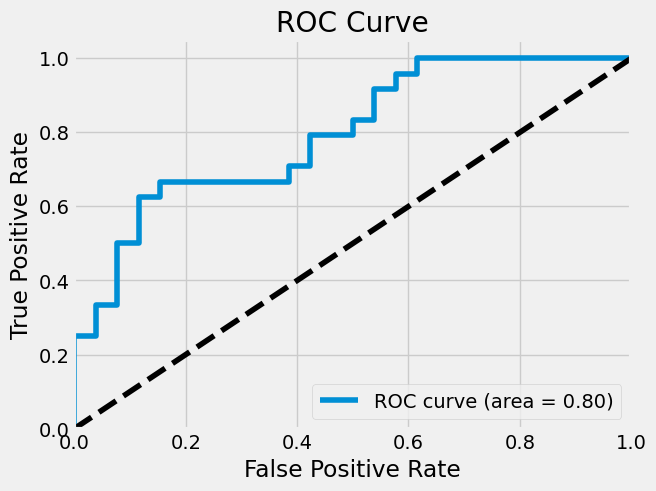

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')

### (IV) 

In [64]:
print("Confusion Matrix Gaussian Naive Bayes: \n", cm_NB)
print("Confusion Matrix Linear Discriminat Analysis: \n", cm_LDA)
print("Confusion Matrix Logisitic Regression: \n", cm_LR)

Confusion Matrix Gaussian Naive Bayes: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Confusion Matrix Linear Discriminat Analysis: 
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
Confusion Matrix Logisitic Regression: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
